In [1]:
%matplotlib inline
import os
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

In [3]:
with open('./dataset/data_dict.pkl','rb') as f:
    data_dict = pickle.load(f)

In [4]:
tf.reset_default_graph()

In [5]:
ckpt = tf.train.get_checkpoint_state(os.path.dirname('./checkpoints/linear-model')) #dir
ckpt

model_checkpoint_path: "./checkpoints/linear-model-30"
all_model_checkpoint_paths: "./checkpoints/linear-model-0"
all_model_checkpoint_paths: "./checkpoints/linear-model-10"
all_model_checkpoint_paths: "./checkpoints/linear-model-20"
all_model_checkpoint_paths: "./checkpoints/linear-model-30"

- graph가 bulid되어 있으면 추가적으로 생성됨 (에러 주의: tf.get_variable, RNN cell...)

In [6]:
ckpt.model_checkpoint_path

'./checkpoints/linear-model-30'

In [7]:
saver = tf.train.import_meta_graph(ckpt.model_checkpoint_path+".meta") 

In [8]:
tf.trainable_variables()

[<tf.Variable 'weight:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'bias:0' shape=(1, 1) dtype=float32_ref>]

In [9]:
tf.get_collection('placeholders')

[<tf.Tensor 'X:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Y:0' shape=(?, 1) dtype=float32>]

In [10]:
tf.get_collection(tf.GraphKeys.LOSSES,'MSE')

[<tf.Tensor 'MSE:0' shape=() dtype=float32>]

In [11]:
X = tf.get_collection('placeholders','X')[0]
Y = tf.get_collection('placeholders','Y')[0]
pred_y = tf.get_collection('pred')[0]
loss = tf.get_collection(tf.GraphKeys.LOSSES,'MSE')[0]

In [12]:
sess= tf.Session(config=config)

In [13]:
if ckpt and ckpt.model_checkpoint_path: #latest
    saver.restore(sess, ckpt.model_checkpoint_path)

INFO:tensorflow:Restoring parameters from ./checkpoints/linear-model-30


In [14]:
x = data_dict['test']['x']
y = data_dict['test']['y']

In [15]:
print('test loss:',sess.run(loss,feed_dict={X: data_dict['test']['x'], Y: data_dict['test']['y']}))

test loss: 218.63133


In [16]:
_pred_y = sess.run(pred_y,feed_dict={X: data_dict['test']['x']})

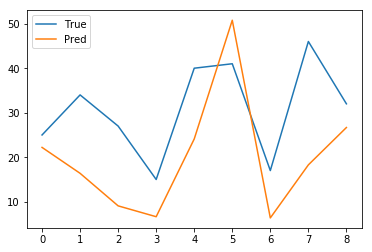

In [17]:
plt.plot(data_dict['test']['y'], label='True')
plt.plot(_pred_y, label='Pred')
plt.legend()